## Analisando Dados de Doenças Cardiovasculares


As doenças cardiovasculares contribuem significativamente, como grupo causal, para a taxa de mortalidade
em todas as regiões brasileiras, principalmente na Região Sudeste. Além disso, constituem uma das principais
causas de permanência hospitalar prolongada e são responsáveis pela principal alocação de recursos públicos
em hospitalizações no Brasil (CASTRO, Luiza, 2004). De acordo com o Ministério da Saúde, estima-se que em 2040 haverá um aumento de 250% nos casos de óbito por Infarto Agudo do Miocárdio (IAM).

<img src="Arquivos/heartdisease.jpg"  width=50%>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de mudanças no estilo de vida, como abandonar o sedentarismo e adquirir uma alimentação balanceada.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes. Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

O trabalho em questão se propõe a analisar dados coletados da <b>Cleveland Clinic Foundation</b>, disponível no Repositório UCI Machine Learning, de maneira a observar padrões e chegar numa conclusão a respeito das informações aferidas.


## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [99]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci, delimiter=',')

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil, index_col = 'ano')

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [100]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [101]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [102]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

## Análise Exploratória

### Q1. Qual o tamanho do dataset?

In [103]:
df.shape

(303, 14)

É importante observar qual o tamanho do nosso dataset, para entender a quantidade de insumos que iremos lidar. Podemos observar acima que o csv é composto por 14 classificações e têm 303 linhas, ou seja, há 303 informações obtidas.

### Q2. Quais as informações estatísticas do dataset?

In [104]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Constatando as informações estatísticas, podemos ter uma primeira percepção das informações que iremos lidar. É possível notar que a média da idade <i>(age)</i> das pessoas analisadas gira em torno dos 54 anos, com o desvio padrão relativamente baixo. Também é possível notar que a maioria das pessoas analisadas são do sexo masculino <i>(sex)</i>. 

<ul>
    <b><li>Há quantas pessoas do sexo masculino (1) e feminino (0)? </li></b>
</ul>

In [105]:
df.sex.value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

Podemos notar que 76% das pessoas analisadas são do sexo masculino. De acordo com a pesquisa realizada pelo Ministério da Saúde, homens são mais suscetíveis às doenças vasculares e cardíacas.

<ul>
    <b><li>Qual a porcentagem de mulheres com doenças cardiovasculares?</li></b>
</ul>

In [106]:
round((df.loc[(df.sex == 0) & (df.num == 1)].shape[0]/df.loc[df.sex == 0].shape[0] * 100),2) 

25.77

<ul>
    <b><li>Qual a porcentagem de homens com doenças cardiovasculares?</li></b>
</ul>

In [107]:
round((df.loc[(df.sex == 1) & (df.num == 1)].shape[0]/df.loc[df.sex == 1].shape[0] * 100),2) 

55.34

A partir dos resultados obtidos podemos observar que a quantidade de homens com doenças cardiovasculares realmente é maior que a das mulheres. Na amostra obtida, aproximadamente 55% dos homens a possuem, enquanto as mulheres são apenas 25%.

Para termos um dado mais palpável, é possível aferir o mesmo buscando diretamente no dataset mulheres com doenças cardiovasculares, o que nos retorna um resultado nulo, em concomitância com a pesquisa realizada pelo Ministério da Saúde.

<ul>
    <b><li>Idade para casos confirmados de doenças cardiovasculares.</li></b>
</ul>

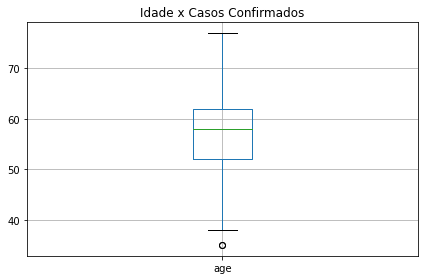

In [108]:
fig, ax = plt.subplots()
ax.set_title("Idade x Casos Confirmados")
df.loc[df['num'] == 1].boxplot(['age'], ax = ax)
plt.tight_layout()

É comprovado que a incidência de tais doenças aumentam com a idade. Considerando o boxplot é possível analisar diversos fatores. Por exemplo, a idade mínima analisada na amostra onde foram confirmados casos de doenças cardiovasculares se aproxima dos 40, muito abaixo disso é um <i>outlier</i>. Ademais, a idade mediana obtida se aproxima dos 60 anos. 

### Q3. Quais os tipos das variáveis do dataset?

In [109]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

### Q4. Quais as 5 primeiras entradas do dataset?

In [110]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Q5. Quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no *dataset*?

In [111]:
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

É possível observar que aproximadamente 45% dos indivíduos analisados possuem algum tipo de doença cardíaca.

### Q6. Há valores ausentes no dataset?

In [112]:
df.isnull().sum()/df.shape[0]

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

Não há valores ausentes no dataset, o que possibilita uma análise mais fidedigna.

## Visualização de Dados

### 1. Gráfico de linha para df_brasil

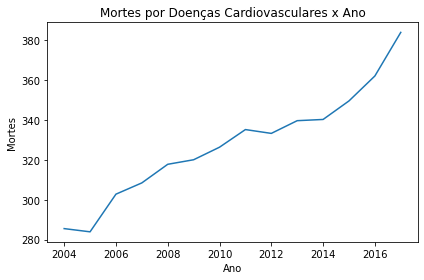

In [113]:
fig, ax = plt.subplots()
df_brasil['mortes_doencas_cardio'].plot(kind = 'line', ax = ax)
ax.set_title("Mortes por Doenças Cardiovasculares x Ano")
ax.set_ylabel("Mortes")
ax.set_xlabel("Ano")
plt.tight_layout()

No Brasil, podemos visualizar que as mortes por doenças cardiovasculares aumentaram no decorrer dos anos. Segundo a Sociedade Brasileira de Cardiologia (SBC), cerca de 14 milhões de brasileiros têm alguma doença no coração e cerca de 400 mil morrem por ano em decorrência dessas enfermidades, o que corresponde a 30% de todas as mortes no país.

### 2. Gráfico de dispersão para as variáveis `age` e `chol`

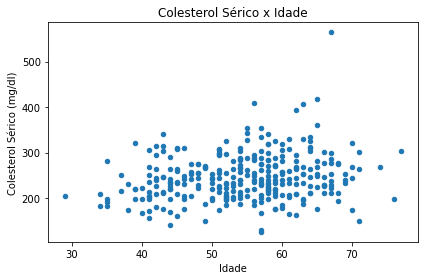

In [114]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'age', y='chol', ax = ax)
ax.set_title("Colesterol Sérico x Idade")
ax.set_ylabel("Colesterol Sérico (mg/dl)")
ax.set_xlabel("Idade")
plt.tight_layout()

De acordo com o Hospital Santa Lúcia, o colesterol, junto com a hipertensão e o diabetes, são os principais fatores de risco para doenças cardiovasculares, principalmente infarto, AVC e tromboses arteriais. Quando elevado, o colesterol aumenta o risco de depósitos de placas ateroscleróticas na parede das artérias, causando a obstrução delas. É considerado arriscado possuir níveis concentrações de colesterol total sérico superiores a 200 mg/dL.

### 3. Histograma para o colesterol sérico

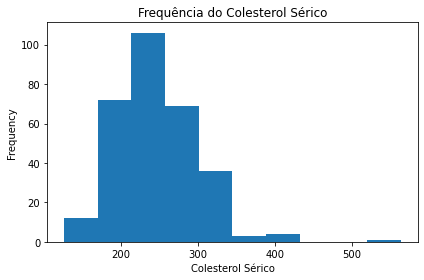

In [115]:
fig, ax = plt.subplots()
df.chol.plot(kind = 'hist', ax = ax)
ax.set_title("Frequência do Colesterol Sérico")
ax.set_xlabel("Colesterol Sérico")
plt.tight_layout()

O colesterol passa a ser problema quando ele se encontra em nível elevado, e pode ser um componente fatal para indivíduos com alta propensão a ter um infarto, ou seja, os tabagistas, sedentários, hipertensos e pessoas com mais de 50 anos de idade. (CONTE, Juliana). Podemos observar no histograma que a maior frequência de colesterol sérico ocorro acima dos 200 mg/dl. Valor considerado de alto risco.

### 4. Gráfico de pizza para `restecg`

In [116]:
# Extrair para um dicionario
restecg = dict(df['restecg'].value_counts())
restecg['Normal'] = restecg.pop(0.0)
restecg['Anormalidades de ST-T'] = restecg.pop(1.0)
restecg['Hipertrofia Ventricular Esquerda Provável ou Definitiva'] = restecg.pop(2.0)
labels = restecg.keys()
sizes = restecg.values()
explode = (0.1, 0, 0)

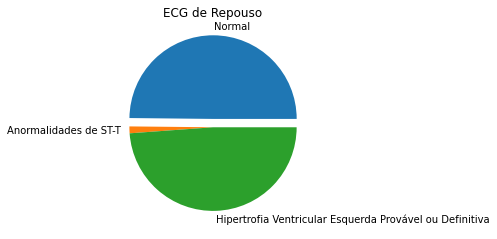

In [117]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels = labels, explode = explode)
ax.set_title("ECG de Repouso")
plt.tight_layout()

O ECG em repouso alterado indica que em algum lugar do sistema elétrico do coração está ocorrendo alguma variação no seu funcionamento. Um ECG com laudo normal indica que a atividade elétrica do coração está em pleno funcionamento. Relata ainda que não existe grandes entupimentos das coronárias e que não há aumento de cavidades ou arritmias. (Morsch, José, 2015).


<b><ul><li>Relação entre ECG e doenças cardiovasculares</li></ul></b>

In [118]:
# Porcentagem de pessoas que tiveram doenças cardiovasculares com o ECG alterado
round(df.loc[(df['num'] == 1) & (df['restecg'] > 0)].shape[0]/df.loc[df['num'] == 1].shape[0] * 100,2)

59.71

In [119]:
# Porcentagem de pessoas que tiveram doenças cardiovasculares com o ECG normal
round(df.loc[(df['num'] == 1) & (df['restecg'] == 0)].shape[0]/df.loc[df['num'] == 1].shape[0] * 100,2)

40.29

Podemos observar que aproximadamente 58% dos indivíduos onde foram constatadas doenças cardiovasculares apresentavam o ECG alterado. Todavia, um número significativo de pessoas que apresentam o ECG normal também constatou doenças, cerca de 41%.

<i>"Vale lembrar que muitas vezes um ECG normal ou alterado não esclarecem de fato a condição de saúde de um paciente.
UM ECG Normal será que isso é suficiente para finalizar uma investigação de doença cardíaca? A resposta é não. Já ouvimos falar de muitos casos em que o paciente realizou um ECG em repouso onde o resultado foi normal e no dia seguinte teve um infarto agudo do miocárdio. Então, como isso é possível? Para pequenos entupimentos das coronárias, cerca de 50% ou menos, o ECG de repouso não auxilia no diagnóstico. O paciente neste caso tem doença e não apareceu no Eletrocardiograma de repouso. (Morsch, José, 2015). </i>

### 5. Gráfico de correlações

In [ ]:
import seaborn as sns
# criar uma matriz de correlação
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## Conclusão

De acordo com os dados supracitados foi possível entender a relação de algumas classificações com as doenças cardiovasculares, bem como analisar alguns padrões e chegar às conclusões comentadas durante a análise exploratória.